# Biomass Production

The oil palm is famous for it's ability to produce oil which is found in the mesocarp and kernel of it's fruit.

Besides producing oil, the oil palm grows fronds, a trunk. Considering production in a plantation, a frond is typically pruned when harvesting the associated fruit bunch. Furthermore, any missed fronds are pruned periodically e.g. every three months. Similarly, palm trees are replanted when they reach a certain age resulting in the "harvest" of trunks.

Furthermore, a large part of the fruit bunches consists out of a stalky material and the fruit mesocarp out of fibers. After extracting the oil from the bunches we are left with empty fruit bunches (EFB). In other words, exploiting oil palm involves EFB production.

In this example we will compare the water-limited biomass production as estimated using PalmSim, comparing a site in Kalimantan with one in Bangladesh.

### What we expect

Given the relatively stable climate in Kalimantan in comparison to Bangladesh, we expect the biomass production overall to be more steady in Kalimantan.



### This Example   

This example has the following outline:

    1. We have a look at the input **weather data**.
    2. We consider the biomass production for a site in Kalimantan
    3. We do the same for a site in Bangladesh
    3. We compare the two cases
 

## Weather data

Most crop simulations require weather input data. Most commonly:
    - Solar irradiance (MJ/m2/day)
    - Precipation (mm/month)
    
And less important
    - Days with rain (1/month)
    
This demo comes with weather data files which can be found in the inputs folder.
    
**Note, these input files can for instance be opened/altered in Excel.**

In [1]:
# import pandas --- spreadsheet library
import pandas as pd

# import matplotlib --- plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# read-in the csv-files

import os
file_dir = os.path.join('.','input')

weather_data = {}

# load all the files in the input directory
for file in os.listdir(file_dir):
    if file.endswith('.csv'):
        
        filename,ext = file.split('.')
        filepath = os.path.join(file_dir,file)

        df = pd.read_csv(filepath,index_col='Date')
        df.index = pd.to_datetime(df.index)
        
        weather_data[filename] = df

In [2]:
list(weather_data)

['bangladesh', 'North Sumatra', 'South Kalimantan', 'South Sumatra']

#### Note the quite variable solar radiation

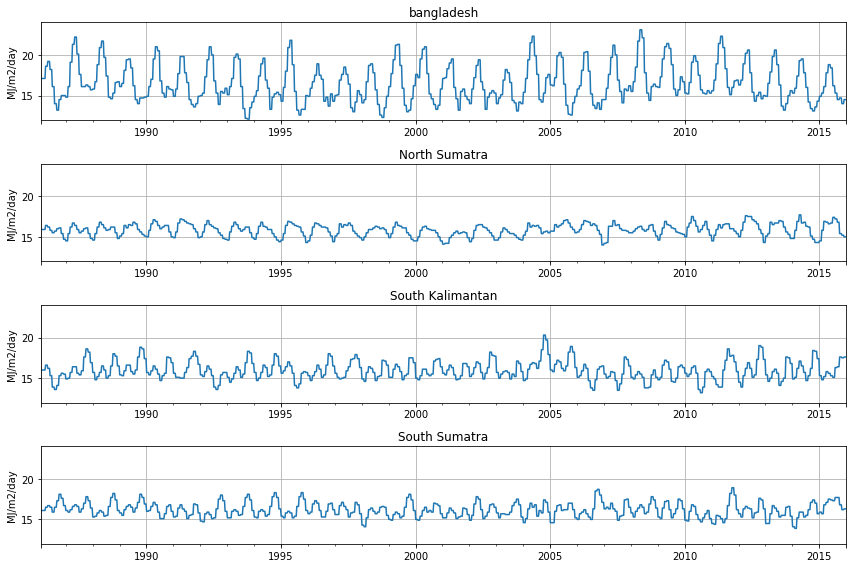

In [7]:
#from plotting import tsplot, add_highlight

f, axes = plt.subplots(len(weather_data), figsize=(12,8))

for ax, site in zip(axes, weather_data):

    s = weather_data[site]['solar (MJ/m2/day)']
    s.plot(ax=ax)
    ax.set_ylim(12,24)
    ax.grid()
    ax.set_title(site)
    ax.set_xlabel('')
    ax.set_ylabel('MJ/m2/day')
    
plt.tight_layout()

Note the relatively sunny and seasonal weather of Bangladesh compared to the rest.

Unfortunately Bangladesh has strong periodic droughts...

So for actual production, not ideal (unless you have irrigation):

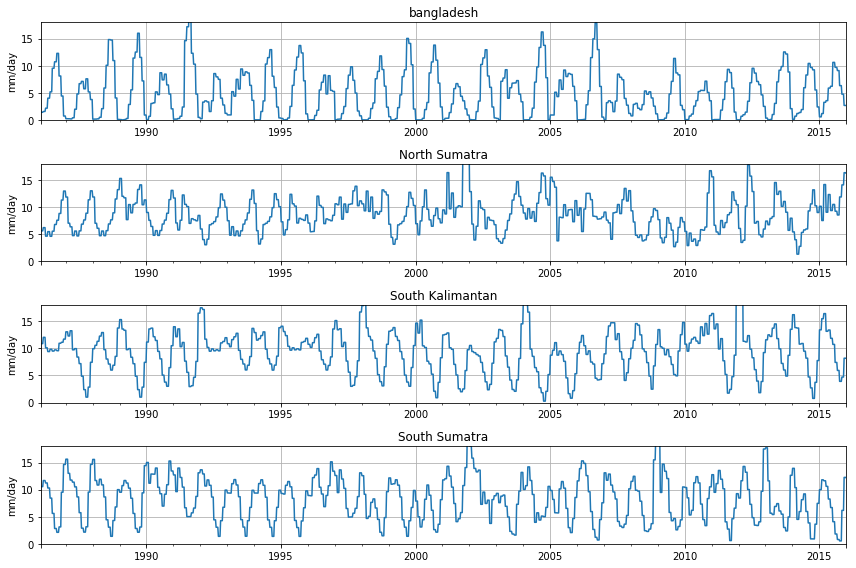

In [8]:
#from plotting import tsplot, add_highlight

f, axes = plt.subplots(len(weather_data), figsize=(12,8))

for ax, site in zip(axes, weather_data):

    s = weather_data[site]['precip (mm/day)']
    s.plot(ax=ax)
    ax.set_ylim(0,18)
    ax.grid()
    ax.set_title(site)
    ax.set_xlabel('')
    ax.set_ylabel('mm/day')
    
plt.tight_layout()

## Kalimantan

Now let us run PalmSim for the site in Kalimantan - given the variable solar radiation and precipitation.

**Note, here we assume fronds are pruned every three months (!).**

In [9]:
import sys
sys.path.append('..')

from palmsim import PalmField

site = 'South Kalimantan'

results = {}

year_of_planting = weather_data[site].index.year[0]

# 1. Initialize the model
p = PalmField(year_of_planting=year_of_planting, dt=10)

# 2. Couple the solar radiation data:
p.weather.radiation_series = weather_data[site]['solar (MJ/m2/day)']
p.weather.rainfall_series = weather_data[site]['precip (mm/day)']

# 3. Run the model
df = p.run(duration=30*365)

results[site] = df

..\palmsim\components\fronds.py:205: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\fronds.py:221: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\fronds.py:263: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\trunk.py:103: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\trunk.py:116: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/lo

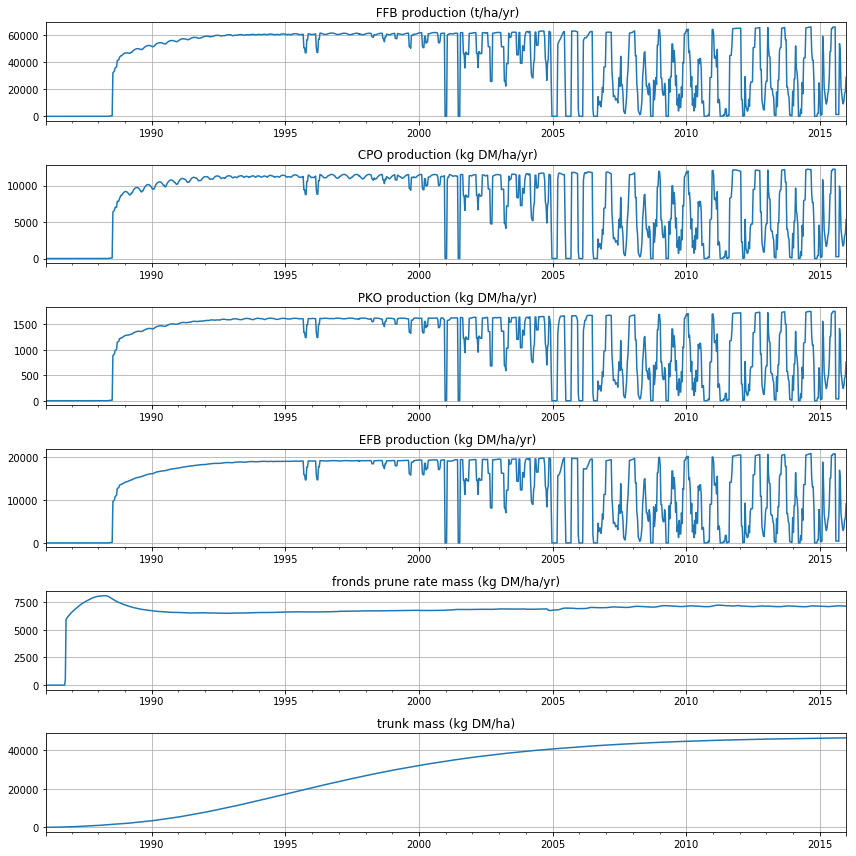

In [10]:
cs = ['generative_FFB_production (t/ha/yr)',
      'generative_CPO_production (kg_DM/ha/day)',
      'generative_PKO_production (kg_DM/ha/day)',
      'generative_EFB_production (kg_DM/ha/day)',
      'fronds_prune_rate_mass (kg_DM/ha/day)',
      'trunk_mass (kg_DM/ha)'
     ]

N = len(cs)

f,axes = plt.subplots(N, figsize=(12,2*N))

for ax, c in zip(axes,cs):

    f = 365 if 'day' in c else 1
    s = f*df[c]
    s.plot(ax=ax)
    ax.grid()
    ax.set_title(c.replace('_', ' ').replace('generative', '').replace('day','yr'))
    ax.set_xlabel('')
    ax.set_ylabel('')
    
plt.tight_layout()

## Bangladesh

Now let us run PalmSim for the site in Bangladesh - given the variable solar radiation and precipitation.

In [13]:
site = 'bangladesh'

year_of_planting = weather_data[site].index.year[0]

# 1. Initialize the model
p = PalmField(year_of_planting=year_of_planting, dt=10)

# 2. Couple the solar radiation data:
p.weather.radiation_series = weather_data[site]['solar (MJ/m2/day)']
p.weather.rainfall_series = weather_data[site]['precip (mm/day)']

# 3. Run the model
df = p.run(duration=30*365)

results[site] = df

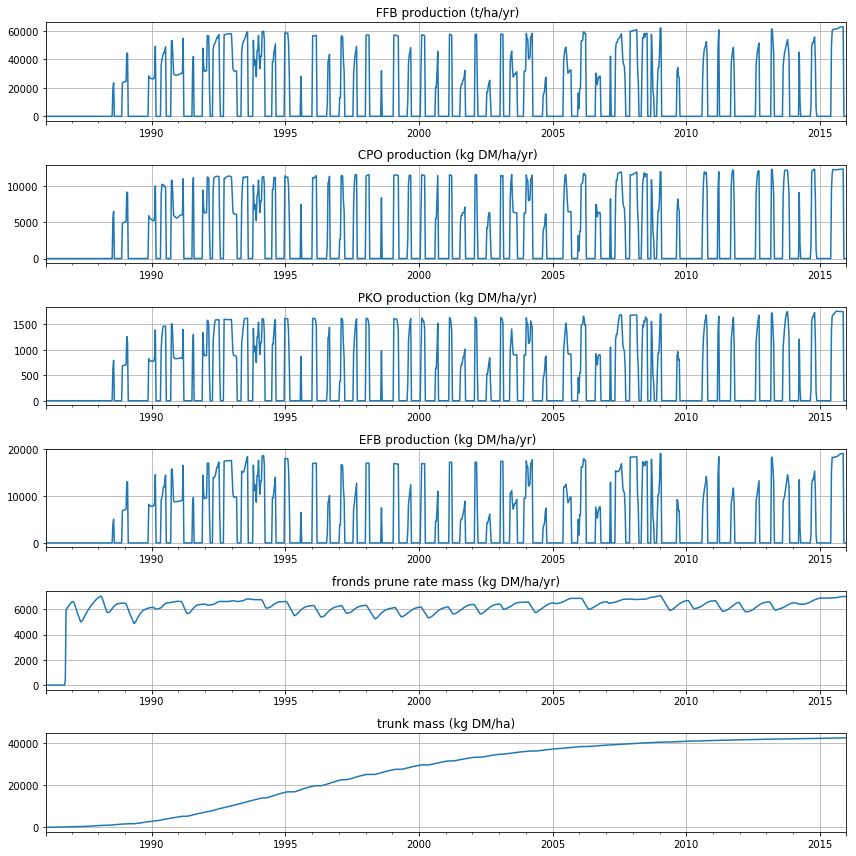

In [14]:
N = len(cs)

f,axes = plt.subplots(N, figsize=(12,2*N))

for ax, c in zip(axes,cs):

    f = 365 if 'day' in c else 1
    s = f*df[c]
    s.plot(ax=ax)
    ax.grid()
    ax.set_title(c.replace('_', ' ').replace('generative', '').replace('day','yr'))
    ax.set_xlabel('')
    ax.set_ylabel('')
    
plt.tight_layout()

# Comparison

Now let us compare the two in the same graph.

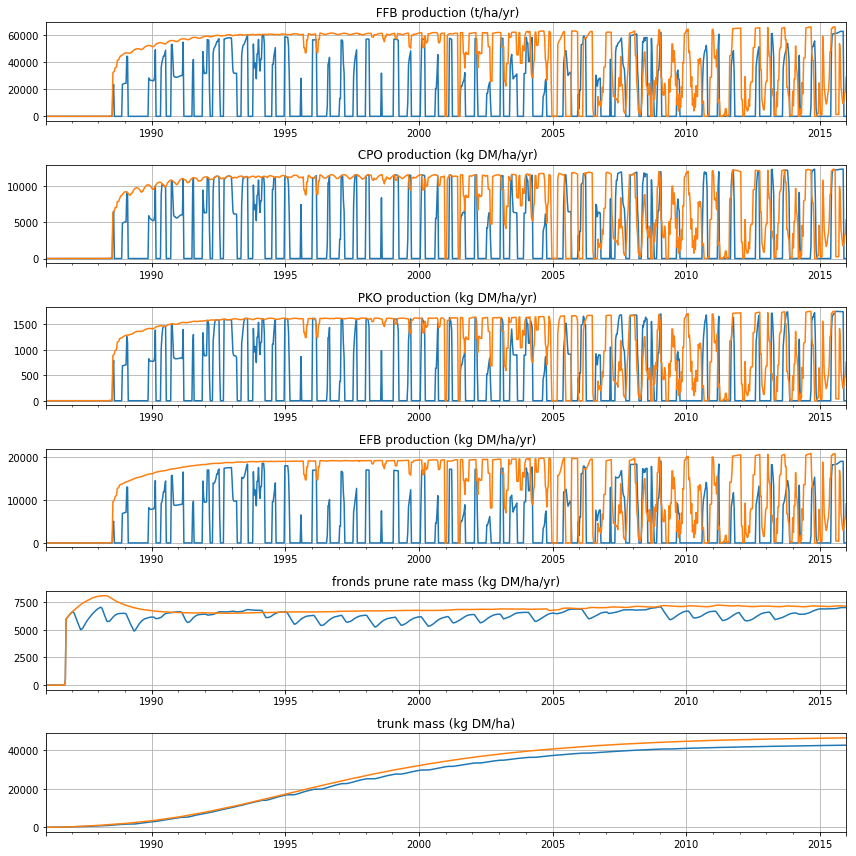

In [16]:
N = len(cs)

f,axes = plt.subplots(N, figsize=(12,2*N))

for site in ['bangladesh', 'South Kalimantan']:
    
    df = results[site]
    
    for ax, c in zip(axes,cs):

        f = 365 if 'day' in c else 1
        s = f*df[c]
        s.plot(ax=ax)
        ax.grid()
        ax.set_title(c.replace('_', ' ').replace('generative', '').replace('day','yr'))
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout()

It goes without saying that the production is estimated to be much more variable for Bangladesh than it is for Kalimantan.

Furthermore, given that the fronds on a block are typically pruned every few months, the production of fronds on a block-level is irregular.

Finally we can estimate the trunk dry-mass as a function of years after planting and thus estimate  the, what could be called, trunk yield.

### Conclusion

This concludes this example.